In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Df=pd.read_csv("test.csv")

In [3]:
backup=Df.copy()

In [4]:
Df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [5]:
Df.tail()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0
504,3,2.0,1301.0,sqft,3000.00,sqft,98103,895000.0


In [6]:
Df.isnull().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [7]:
Df.shape

(505, 8)

In [8]:
Df=Df.drop('lot_size',axis=1)


In [9]:
Df=Df.drop('lot_size_units',axis=1)

In [10]:
Df.head()

,beds,baths,size,size_units,zip_code,price
0,3,3.0,2850.0,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,98188,565000.0
4,3,3.5,1942.0,sqft,98107,1187000.0


In [11]:
Df.isnull().sum()

beds          0
baths         0
size          0
size_units    0
zip_code      0
price         0
dtype: int64

In [12]:
Df['size_units'].unique()

array(['sqft'], dtype=object)

In [13]:
Df=Df.drop('size_units',axis=1)

In [14]:
Df.describe()

,beds,baths,size,zip_code,price
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,98199.000000,6.250000e+06


In [15]:
Df['baths']=Df['baths'].astype(int)

In [16]:
Df.head()

,beds,baths,size,zip_code,price
0,3,3,2850.0,98119,1175000.0
1,4,5,3040.0,98106,1057500.0
2,3,1,1290.0,98125,799000.0
3,3,2,2360.0,98188,565000.0
4,3,3,1942.0,98107,1187000.0


In [17]:
Df.describe()

,beds,baths,size,zip_code,price
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,2.954455,2.041584,1851.843564,98125.366337,9.795822e+05
std,1.214947,0.976029,922.556090,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,98101.000000,1.700000e+05
25%,2.000000,1.000000,1171.000000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,98118.000000,8.400000e+05
75%,4.000000,2.000000,2400.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,98199.000000,6.250000e+06


{'whiskers': [<matplotlib.lines.Line2D at 0x2102e7d37f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2102e7d3e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2102e7d3520>],
 'medians': [<matplotlib.lines.Line2D at 0x2102e7f0370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2102e7f0640>],
 'means': []}

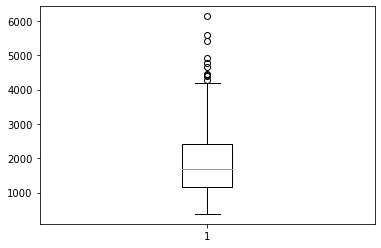

In [18]:
plt.boxplot(Df['size'])

In [19]:
count=0
for i in Df['size']:
    if i>4000:
        print(i)
        count+=1
print("Total outlier are:",count)

4027.0
6139.0
4770.0
4280.0
4120.0
4385.0
4060.0
4460.0
4670.0
4190.0
4935.0
4420.0
5420.0
5580.0
Total outlier are: 14


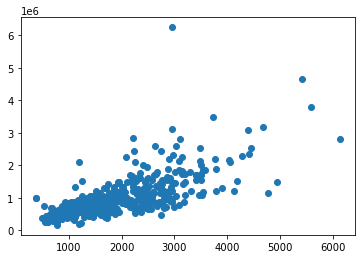

In [20]:
plt.scatter(Df['size'],Df['price'])

In [21]:
# method 1.
Q1 = np.percentile(Df['size'],25)
Q3 = np.percentile(Df['size'],75)
print(Q1)
print(Q3)

# Finding inter quartile range 
IQR = Q3 - Q1
ul = Q3 +1.5*IQR
ll  = Q1 -1.5*IQR
print(ul )
print(ll )

1171.0
2400.0
4243.5
-672.5


In [22]:
#droping the outlier 
Df= Df[(Df['size'] < ul) & (Df['size'] > ll)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2102e95e160>,
 'caps': [<matplotlib.lines.Line2D at 0x2102e95e700>,
 'boxes': [<matplotlib.lines.Line2D at 0x2102e94ce50>],
 'medians': [<matplotlib.lines.Line2D at 0x2102e95eca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2102e95ef70>],
 'means': []}

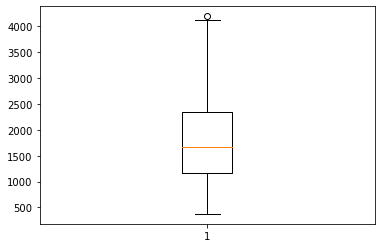

In [23]:
plt.boxplot(Df['size'])

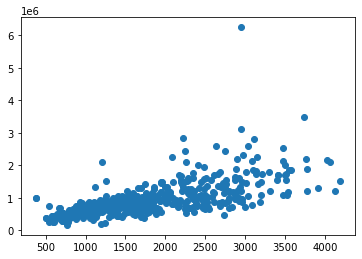

In [24]:
plt.scatter(Df['size'],Df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2102ea346a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2102ea34c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2102ea343d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2102ea40220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2102ea404f0>],
 'means': []}

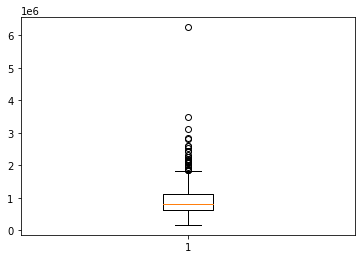

In [25]:
plt.boxplot(Df['price'])

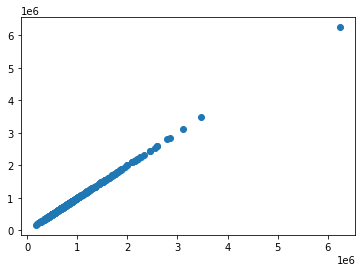

In [26]:
plt.scatter(Df['price'],Df['price'])

In [27]:
# method 1.
Q11 = np.percentile(Df['price'],25)
Q33 = np.percentile(Df['price'],75)
print(Q11)
print(Q33)

# Finding inter quartile range 
IQR1 = Q33 - Q11
ul1 = Q33 +1.5*IQR1
ll1  = Q11 -1.5*IQR1
print(ul1 )
print(ll1 )

615000.0
1106000.0
1842500.0
-121500.0


In [28]:
outlier=0
for i in Df['price']:
    if i>ul1:
        print(i)
        outlier+=1
print("Total Outlier are:",outlier)


2450000.0
2170000.0
2850000.0
1870000.0
2800000.0
1850000.0
1850000.0
1950000.0
2250000.0
3480000.0
2600000.0
2200000.0
2150000.0
2100000.0
2334500.0
2125000.0
2095000.0
6250000.0
2600000.0
2550000.0
2000000.0
2000000.0
2450000.0
2100000.0
1875000.0
2266000.0
2206500.0
1900000.0
3105000.0
Total Outlier are: 29


In [29]:
mean=944087.6121212121

In [30]:
#replacing outlier with mean value
Df['price']=np.where(Df['price']>ul1,mean,Df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2102eb04790>,
 'caps': [<matplotlib.lines.Line2D at 0x2102eb04d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2102eb044c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2102eb13310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2102eb135e0>],
 'means': []}

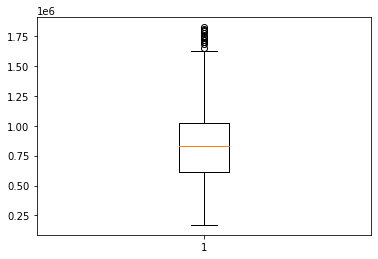

In [31]:
plt.boxplot(Df['price'])

In [32]:
Df['beds'].unique()

array([3, 4, 2, 1, 7, 5, 6], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x2102eb6f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2102eb6fc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2102eb6f400>],
 'medians': [<matplotlib.lines.Line2D at 0x2102eb7c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2102eb7c520>],
 'means': []}

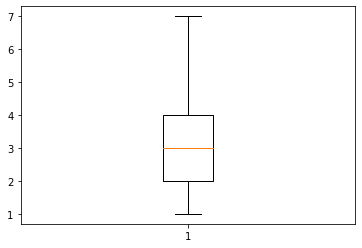

In [33]:
plt.boxplot(Df['beds'])

In [34]:
Df['baths'].unique()

array([3, 5, 1, 2, 6, 4, 7])

{'whiskers': [<matplotlib.lines.Line2D at 0x2102ebdc340>,
 'caps': [<matplotlib.lines.Line2D at 0x2102ebdc8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2102ebdc070>],
 'medians': [<matplotlib.lines.Line2D at 0x2102ebdce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2102ebe9190>],
 'means': []}

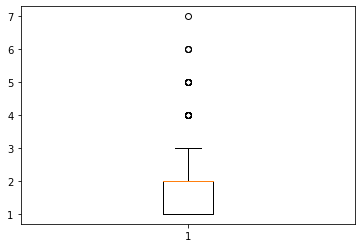

In [35]:
plt.boxplot(Df['baths'])

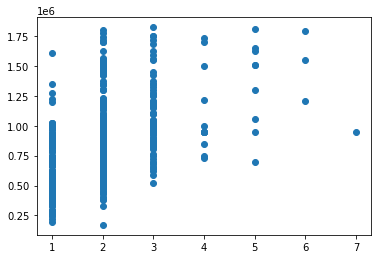

In [36]:
plt.scatter(Df['baths'],Df['price'])

In [37]:
Df.head()

,beds,baths,size,zip_code,price
0,3,3,2850.0,98119,1175000.0
1,4,5,3040.0,98106,1057500.0
2,3,1,1290.0,98125,799000.0
3,3,2,2360.0,98188,565000.0
4,3,3,1942.0,98107,1187000.0


In [38]:
# method 1.
Q111 = np.percentile(Df['baths'],25)
Q333 = np.percentile(Df['baths'],75)
print(Q111)
print(Q333)

# Finding inter quartile range 
IQR2 = Q333 - Q111
ul2 = Q333 +1.5*IQR2
ll2  = Q111 -1.5*IQR2
print(ul2 )
print(ll2 )

1.0
2.0
3.5
-0.5


In [39]:
outlier1=0
for i in Df['baths']:
    if i>ul2:
        print(i)
        outlier1+=1
print("Total Outlier are:",outlier1)


5
6
4
6
5
4
7
4
5
5
4
5
4
5
4
5
4
5
4
4
4
4
4
4
6
5
Total Outlier are: 26


In [40]:
#replacing outlier with mean value
Df['baths']=np.where(Df['baths']>ul2,3,Df['baths'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2102ecb1970>,
 'caps': [<matplotlib.lines.Line2D at 0x2102ecb1f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2102ecb16a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2102ecc03d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2102ecc06a0>],
 'means': []}

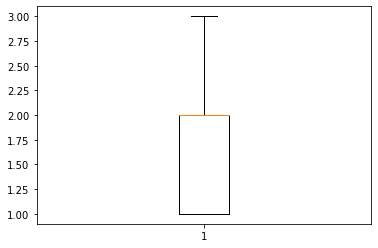

In [41]:
plt.boxplot(Df['baths'])

In [42]:
Df['baths'].unique()

array([3, 1, 2])

In [43]:
Df.head()

,beds,baths,size,zip_code,price
0,3,3,2850.0,98119,1175000.0
1,4,3,3040.0,98106,1057500.0
2,3,1,1290.0,98125,799000.0
3,3,2,2360.0,98188,565000.0
4,3,3,1942.0,98107,1187000.0


In [44]:
#Resetting index
Df.reset_index(drop=True, inplace=True)

In [45]:
Df.shape

(495, 5)

In [46]:
#ackup for original preprocessed data
Df_R=Df.copy()

In [47]:
Df_R.head()

,beds,baths,size,zip_code,price
0,3,3,2850.0,98119,1175000.0
1,4,3,3040.0,98106,1057500.0
2,3,1,1290.0,98125,799000.0
3,3,2,2360.0,98188,565000.0
4,3,3,1942.0,98107,1187000.0


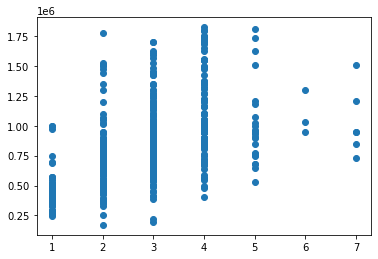

In [48]:
plt.scatter(Df['beds'],Df['price'])

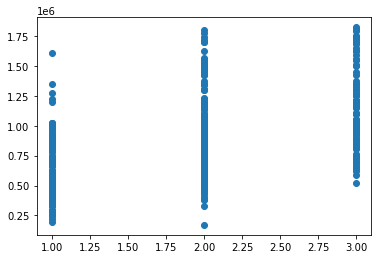

In [49]:
plt.scatter(Df['baths'],Df['price'])

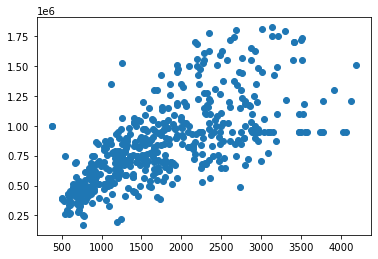

In [50]:
plt.scatter(Df['size'],Df['price'])

<BarContainer object of 495 artists>

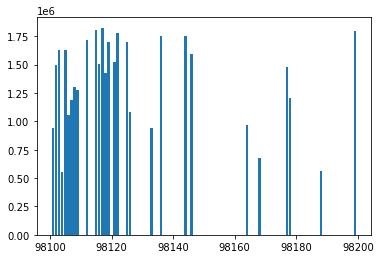

In [51]:
plt.bar(Df['zip_code'],Df['price'])

<BarContainer object of 495 artists>

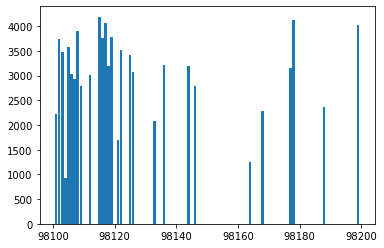

In [52]:
plt.bar(Df['zip_code'],Df['size'])

In [53]:
X=Df.drop('price',axis=1)
Y=Df['price']

In [54]:
from sklearn.model_selection import train_test_split

# Splitting the data into a training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [55]:
#building a model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(X_train,Y_train)

LinearRegression()

In [58]:
Pred=lr.predict(X_test)

In [59]:
Pred

array([1246628.022835  , 1339675.60245906,  612078.27476664,
        798002.87555827,  575883.99276434,  792772.18825269,
        869677.9944717 ,  877412.68923411,  654411.97359788,
        551931.78825375,  907782.83040547,  722846.45943493,
        935730.33315548, 1055227.5205211 , 1101285.16599619,
        694072.40330109, 1227870.39610949,  760771.19124292,
       1200381.59201027,  372066.58938225, 1080543.658824  ,
        497663.04461321,  754705.25588401, 1049116.15174319,
        690930.98356022,  803110.31603876,  760225.96159628,
        801650.16016598,  840491.05373785,  552614.56323464,
        528346.87049474,  641338.92264748, 1056686.44085616,
        638954.75577268,  922934.18983844,  869508.67155297,
        865459.00053394, 1068364.81321083,  989982.22694972,
        954743.81379557, 1040802.90827335,  539251.50732321,
        903115.05457851, 1369735.2912593 ,  598078.03224809,
        610248.42231436,  767189.73421244, 1294982.90063702,
       1016081.95629288,

In [60]:
r2_score(Y_test,Pred)

0.4462571659914448

In [61]:
#scaling the data to impore model accuracy 

from sklearn.preprocessing import StandardScaler

In [62]:
Scale = StandardScaler()

In [63]:
scaledX = Scale.fit_transform(X)

In [64]:
scaledX

array([[ 0.07404708,  1.50687883,  1.29728471, -0.25094598],
       [ 0.9264495 ,  1.50687883,  1.52984878, -0.7776379 ],
       [ 0.07404708, -1.27634886, -0.61218877, -0.00785741],
       ...,
       [ 0.07404708,  0.11526499,  1.41968685, -0.29146075],
       [ 1.77885192,  1.50687883,  1.49312814, -0.41300503],
       [ 0.07404708,  0.11526499, -0.59872453, -0.89918218]])

In [65]:
from sklearn.model_selection import train_test_split

 #Splitting the data into a training and test set
x_train, x_test, y_train, y_test = train_test_split(scaledX, Y, test_size=0.1)

In [66]:
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
y_Pred=lr.predict(x_test)

In [68]:
y_Pred

array([ 952447.89705542,  915998.91806021,  523426.16752087,
       1089330.94769738,  771250.47298502,  708560.45930963,
        961022.35111612, 1190183.29653343,  653728.37004112,
       1010948.49368044,  828010.48957726, 1284689.08899954,
        639592.37558542,  550651.24988921,  820941.23577654,
        949252.39258782,  774989.26213854,  712015.65986869,
       1051496.70078074,  666826.95249718,  759124.46624087,
        536429.6983196 ,  542297.88386475,  688483.97759254,
       1122490.00044913,  834944.8894214 , 1149787.17208766,
       1082838.52353417, 1170047.76389993,  969571.5587423 ,
        682013.56266807,  739195.98305717,  543307.17798742,
        742802.37226111,  617291.12255246,  763165.25027851,
       1043707.26269497,  951700.16563614,  564288.8842006 ,
        757739.45784974,  822546.50193087,  803791.80399667,
       1029934.1445455 , 1256303.47677939,  772313.9737467 ,
        970325.54750924,  851866.34593589,  615490.2318403 ,
        702670.94149149,

In [69]:
r2_score(y_test,y_Pred)

0.4911814119389968

In [70]:
# trying to impore model by finding the best value for randome state
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_Pred=lr.predict(x_test)
    scores.append(r2_score(y_test,y_Pred))

In [71]:
np.argmax(scores) #867

867

In [72]:
scores[np.argmax(scores)] #0.7010212968599403

0.7010212968599403

In [73]:
backup

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [74]:
temp=backup.iloc[:,3:6]

In [75]:
backup=backup.drop(temp,axis=1)

In [76]:
backup.head()

,beds,baths,size,zip_code,price
0,3,3.0,2850.0,98119,1175000.0
1,4,5.0,3040.0,98106,1057500.0
2,3,1.0,1290.0,98125,799000.0
3,3,2.0,2360.0,98188,565000.0
4,3,3.5,1942.0,98107,1187000.0


In [77]:
X1=backup.drop("price",axis=1)
Y1=backup['price']

In [86]:
X1


,beds,baths,size,zip_code
0,3,3.0,2850.0,98119
1,4,5.0,3040.0,98106
2,3,1.0,1290.0,98125
3,3,2.0,2360.0,98188
4,3,3.5,1942.0,98107
...,...,...,...,...
500,5,4.5,5580.0,98146
501,3,2.5,1390.0,98126
502,3,2.5,2950.0,98118
503,5,5.0,3010.0,98115


In [78]:
# without scaling 
scores1=[]
for i in range(1000):
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1,random_state=i)
    linear=LinearRegression()
    linear.fit(X1_train,Y1_train)
    Y1_Pred=linear.predict(X1_test)
    scores1.append(r2_score(Y1_test,Y1_Pred))

In [79]:
np.argmax(scores1) #700

700

In [80]:
scores1[np.argmax(scores1)] #0.8265344693807725

0.8265344693807725

In [81]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1,random_state=np.argmax(scores1))

In [82]:
linear=LinearRegression()
linear.fit(X1_train,Y1_train)

LinearRegression()

In [83]:
Y1_Pred=linear.predict(X1_test)

In [84]:
r2_score(Y1_test,Y1_Pred)

0.8265344693807725

In [91]:
result=linear.predict([[3,3.0,2850.0,98119]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
result

array([1556530.03655995])

In [93]:
import pickle
pickle.dump(linear, open('./US_Hosue_Price_Model.sav', 'wb'))